In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
mnist = fetch_mldata('MNIST original', data_home='./mnist/')

In [10]:
train_X = mnist.data[:60000]
train_labels = mnist.target[:60000]

In [11]:
test_X = mnist.data[60000:]
test_labels = mnist.target[60000:]

In [12]:
def get_label(x, i):
    if x == i:
        return 1.0
    return 0.0

In [13]:
train_labels = [[get_label(x, i) for i in range(10)] for x in train_labels]

In [14]:
test_labels = [[get_label(x, i) for i in range(10)] for x in test_labels]

In [15]:
test_labels = np.array(test_labels)
train_labels = np.array(train_labels)
print(test_labels.shape)
print(train_labels.shape)

(10000, 10)
(60000, 10)


In [16]:
train_data = [x for x in zip(train_X, labels)]

In [17]:
shuffled_train_data = shuffle(train_data)

In [19]:
input_dim = mnist.data[0].shape[0]
size_of_hidden_layer = 300
number_of_labels = 10

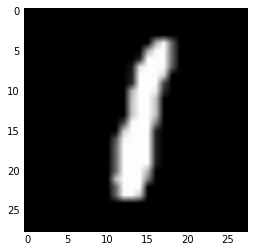

In [23]:
plt.imshow(np.reshape(shuffled_train_data[10][0], (28, 28)), cmap='Greys_r')

In [25]:
X = tf.placeholder(tf.float32, shape=[None, input_dim])
W_1 = tf.Variable(tf.random_normal([input_dim, size_of_hidden_layer]))
biases_1 = tf.Variable(tf.zeros([size_of_hidden_layer]))
H_1 = tf.sigmoid(tf.matmul(X, W_1) + biases_1)

W_2 = tf.Variable(tf.random_normal([size_of_hidden_layer, number_of_labels]))
biases_2 = tf.Variable(tf.zeros([number_of_labels]))

y = tf.matmul(H_1, W_2) + biases_2

In [26]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

In [28]:
train_step = tf.train.AdamOptimizer().minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [41]:
batch_size = 64
num_epochs = 10

init = tf.initialize_all_variables()
with tf.Session() as session:
    session.run(init)
    for _ in range(num_epochs):
        for i in range(0, len(shuffled_train_data), batch_size):
            batch_x = np.array([x[0] for x in shuffled_train_data[i: i + batch_size]])
            batch_y = np.array([x[1] for x in shuffled_train_data[i: i + batch_size]])
            session.run(train_step, feed_dict={X: batch_x, y_: batch_y})
        print(session.run(accuracy, feed_dict={X: test_X, y_: test_labels}))

0.6002
0.7322
0.7889
0.8114
0.8329
0.8438
0.852
0.8603
0.8644
0.8731


In [70]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [71]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [88]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(accuracy, feed_dict={X: test_X, y_: test_labels}))

0.095
